In [1]:
from models.transfer_models import get_resnet18
from training.train_transfer import train_transfer
from utils.dataset import FlowersDataset, get_train_transforms, get_test_transforms
from torch.utils.data import DataLoader
import torch

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_ds = FlowersDataset("../data/processed/train", transform=get_train_transforms())
val_ds = FlowersDataset("../data/processed/val", transform=get_test_transforms())

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

In [3]:
# Feature Extraction
model_fe = get_resnet18(num_classes=5, feature_extract=True).to(device)

history_fe = train_transfer(
    model_fe,
    train_loader,
    val_loader,
    device,
    epochs=10,
    lr_backbone=0.0, # повністю заморожено
    lr_head=1e-3, # тренуємо тільки classifier
    save_path="../checkpoints/resnet_fe.pth"
)

C:\Users\furenzoku\Desktop\uni\python for deep\module-2\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\furenzoku\Desktop\uni\python for deep\module-2\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



Epoch 1/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  5.25it/s]


Train Loss: 0.9833 | Train Acc: 0.6307
Val Loss:   0.7117 | Val Acc:   0.7484
Найкраща модель збережена

Epoch 2/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.61it/s]


Train Loss: 0.6271 | Train Acc: 0.7784
Val Loss:   0.5910 | Val Acc:   0.7966
Найкраща модель збережена

Epoch 3/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  5.11it/s]


Train Loss: 0.5611 | Train Acc: 0.8009
Val Loss:   0.5543 | Val Acc:   0.8121
Найкраща модель збережена

Epoch 4/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.95it/s]


Train Loss: 0.5163 | Train Acc: 0.8079
Val Loss:   0.5444 | Val Acc:   0.8090
Найкраща модель збережена

Epoch 5/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  5.25it/s]


Train Loss: 0.4906 | Train Acc: 0.8248
Val Loss:   0.5208 | Val Acc:   0.8121
Найкраща модель збережена

Epoch 6/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  5.11it/s]


Train Loss: 0.4796 | Train Acc: 0.8235
Val Loss:   0.5010 | Val Acc:   0.8245
Найкраща модель збережена

Epoch 7/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  5.13it/s]


Train Loss: 0.4687 | Train Acc: 0.8337
Val Loss:   0.5029 | Val Acc:   0.8152

Epoch 8/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.41it/s]


Train Loss: 0.4540 | Train Acc: 0.8380
Val Loss:   0.4961 | Val Acc:   0.8307
Найкраща модель збережена

Epoch 9/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.95it/s]


Train Loss: 0.4468 | Train Acc: 0.8370
Val Loss:   0.5057 | Val Acc:   0.8276

Epoch 10/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  5.27it/s]

Train Loss: 0.4500 | Train Acc: 0.8394
Val Loss:   0.5094 | Val Acc:   0.8090


In [4]:
# Fine-Tuning
model_ft = get_resnet18(num_classes=5, feature_extract=False).to(device)

history_ft = train_transfer(
    model_ft,
    train_loader,
    val_loader,
    device,
    epochs=10,
    lr_backbone=1e-5,     # дуже маленький LR
    lr_head=1e-3,
    save_path="../checkpoints/resnet_ft.pth"
)


Epoch 1/10


Validation: 100%|██████████| 21/21 [00:03<00:00,  6.20it/s]


Train Loss: 0.8554 | Train Acc: 0.6823
Val Loss:   0.5336 | Val Acc:   0.8152
Найкраща модель збережена

Epoch 2/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.83it/s]


Train Loss: 0.4553 | Train Acc: 0.8417
Val Loss:   0.4492 | Val Acc:   0.8478
Найкраща модель збережена

Epoch 3/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.82it/s]


Train Loss: 0.3261 | Train Acc: 0.8827
Val Loss:   0.3838 | Val Acc:   0.8727
Найкраща модель збережена

Epoch 4/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.79it/s]


Train Loss: 0.2527 | Train Acc: 0.9155
Val Loss:   0.3895 | Val Acc:   0.8711

Epoch 5/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.90it/s]


Train Loss: 0.1904 | Train Acc: 0.9391
Val Loss:   0.3531 | Val Acc:   0.8773
Найкраща модель збережена

Epoch 6/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.83it/s]


Train Loss: 0.1529 | Train Acc: 0.9480
Val Loss:   0.3645 | Val Acc:   0.8742

Epoch 7/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.72it/s]


Train Loss: 0.1217 | Train Acc: 0.9603
Val Loss:   0.3606 | Val Acc:   0.8804

Epoch 8/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.82it/s]


Train Loss: 0.0868 | Train Acc: 0.9775
Val Loss:   0.3749 | Val Acc:   0.8742

Epoch 9/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.82it/s]


Train Loss: 0.0667 | Train Acc: 0.9848
Val Loss:   0.3727 | Val Acc:   0.8696

Epoch 10/10


Validation: 100%|██████████| 21/21 [00:04<00:00,  4.96it/s]

Train Loss: 0.0466 | Train Acc: 0.9907
Val Loss:   0.3935 | Val Acc:   0.8882
early stopping


In [5]:
import matplotlib.pyplot as plt

def plot_hist(history, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history["train_loss"], label="train")
    plt.plot(history["val_loss"], label="val")
    plt.title(title + " Loss")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history["train_acc"], label="train")
    plt.plot(history["val_acc"], label="val")
    plt.title(title + " Accuracy")
    plt.legend()


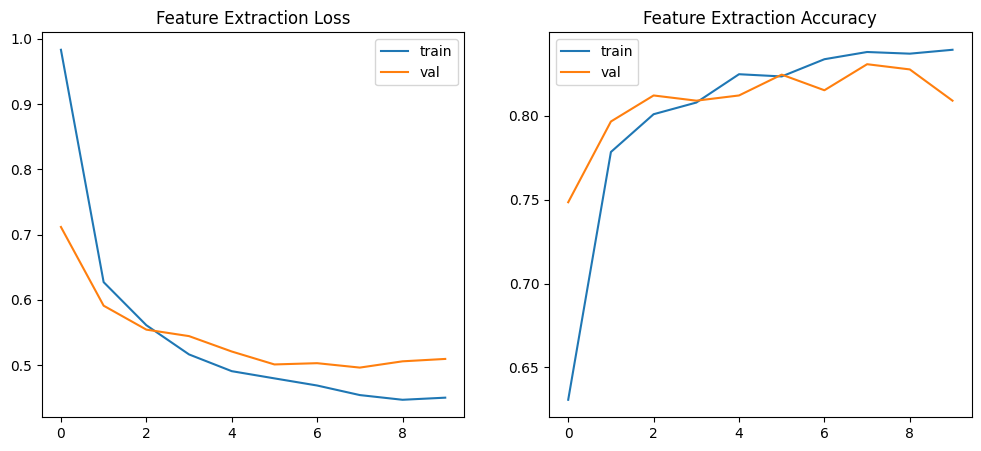

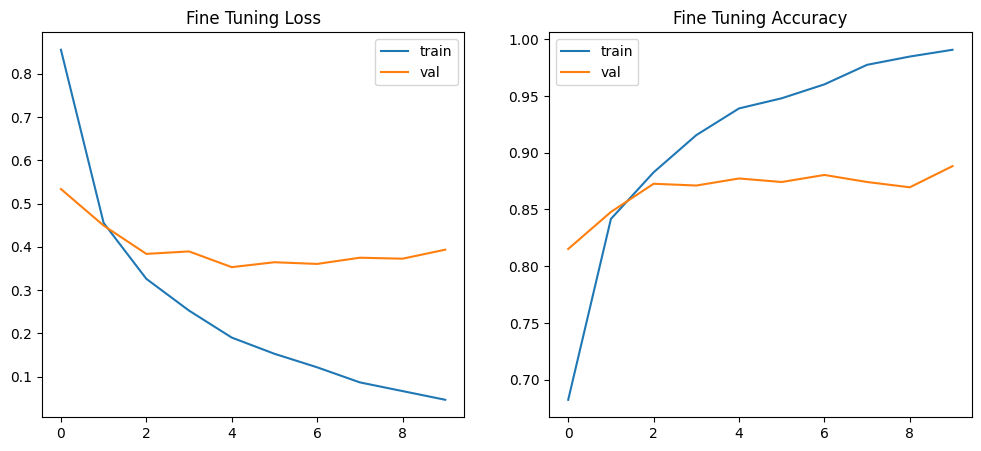

In [6]:
plot_hist(history_fe, "Feature Extraction")
plt.savefig("../results/transfer_fe_curves.png", dpi=300)
plt.show()

plot_hist(history_ft, "Fine Tuning")
plt.savefig("../results/transfer_ft_curves.png", dpi=300)
plt.show()